## Estudo de Grafos e análise de Centralidade em Sistemas de Transmissão de Energia

### Bibliotecas Necessárias para a execução do arquivo

Executa a instalação das bibliotecas através do pip (Verificar se o python3-pip está instalado)

In [68]:
""" apt install build-essential
apt install python3-pip
apt install python3-tk """
import sys
# pacotes necessários para execução do código
!python3 -m pip install networkx pandas matplotlib numpy scipy

Defaulting to user installation because normal site-packages is not writeable


Importando as bibliotecas para o projeto

In [69]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

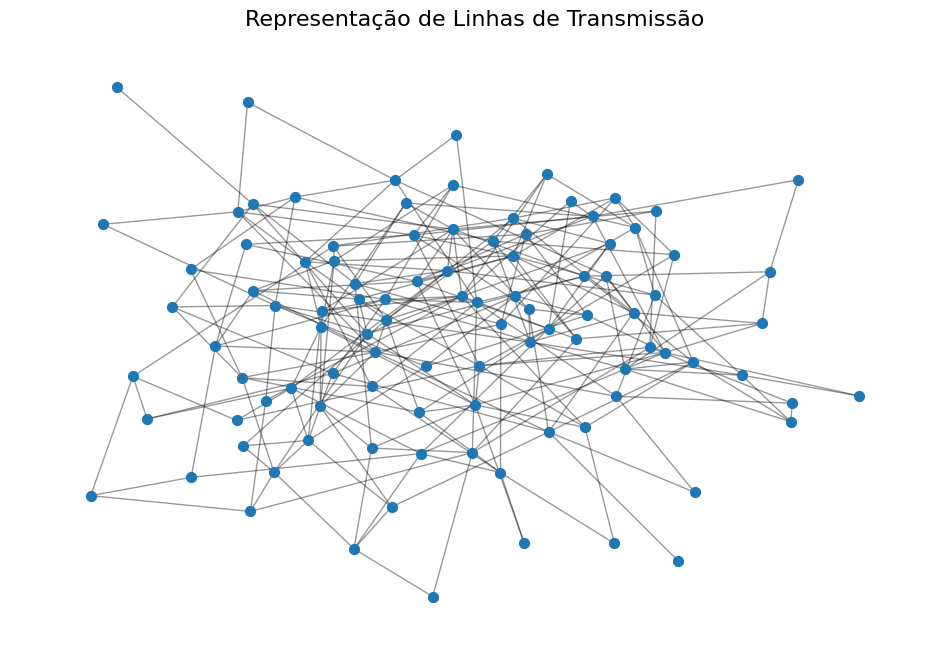

In [70]:
# cria um grafo aleatório
H = nx.gnp_random_graph(100, 0.05)
# salva o grafo em um arquivo csv
nx.write_edgelist(H, "graph.csv", delimiter=",", data=False)
# faz a leitura do arquivo csv e cria um grafo
G = nx.read_edgelist("graph1.csv", delimiter=",", nodetype=int)

# imprimindo o grafo
plt.figure(1, figsize=(12, 8))
pos=nx.fruchterman_reingold_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=50)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.title('Representação de Linhas de Transmissão', size=16)
plt.show()

- [gnp_random_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html#) - gera um grafo aleatório com x nós e y probabilidades de conexão de arestas.
- [write_edgelist](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.write_edgelist.html#write-edgelist) - gera uma lista de arestas e escreve em um arquivo csv.
- [read_edgelist](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html#read-edgelist) - faz a leitura de uma lista de arestas em um arquivo csv e cria um grafo a partir da mesma.
- [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure) - cria uma figura.
- [draw_networkx_nodes]() - desenha na figura gerada os nós do grafo.
- [draw_networkx_edges]() - desenha na figura gerada as arestas do grafo.
- [show]() - imprime em uma interface gráfica a figura gerada.

In [71]:
# Calculando o grau para cada nó
deg = dict(nx.degree(G))
# Transforma num DataFrame (pandas)
degree = pd.DataFrame.from_dict(data=deg, orient='index')
# Apresenta apenas os valores do dicionário com os graus
deg.values()


dict_values([5, 4, 5, 1, 9, 7, 3, 8, 6, 7, 5, 5, 6, 5, 6, 7, 3, 5, 8, 6, 4, 4, 5, 7, 8, 5, 5, 3, 3, 9, 8, 3, 8, 5, 6, 11, 4, 5, 4, 4, 9, 7, 2, 6, 6, 6, 4, 5, 6, 3, 5, 5, 5, 6, 5, 4, 4, 6, 6, 7, 4, 2, 4, 8, 3, 6, 6, 4, 8, 4, 6, 5, 3, 5, 9, 2, 4, 2, 6, 7, 6, 5, 4, 6, 5, 5, 5, 4, 3, 4, 3, 2, 1, 2, 6, 5, 2, 2, 2, 3])

- [degree](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html#degree) - calcula o grau de cada nó e salva em um dicionário.
- [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) - transforma o dicionário em um tipo DataFrame.
- [values]() - imprime somente os valores dos graus dos nós.

In [72]:
stats.describe(degree)

DescribeResult(nobs=100, minmax=(array([1]), array([11])), mean=array([5.02]), variance=array([3.87838384]), skewness=array([0.31495536]), kurtosis=array([0.00635108]))

- [describe](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html) - calcula dados estatísticos do vetor passado (número de elementos, valores máximos e mínimos, variância, etc).

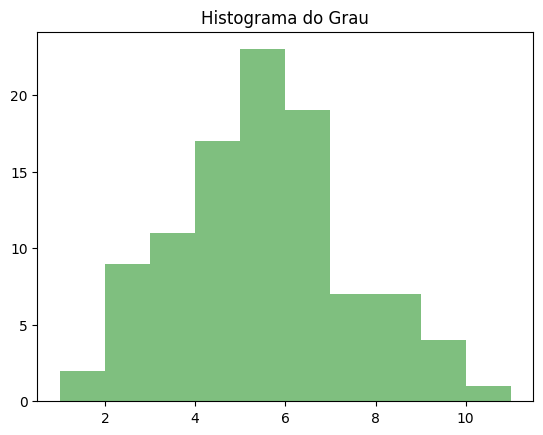

In [73]:
plt.hist(degree, color="green", alpha=.5)
plt.title('Histograma do Grau')
plt.show()


- [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) - imprime o histograma representando os valores passados como parâmetros.

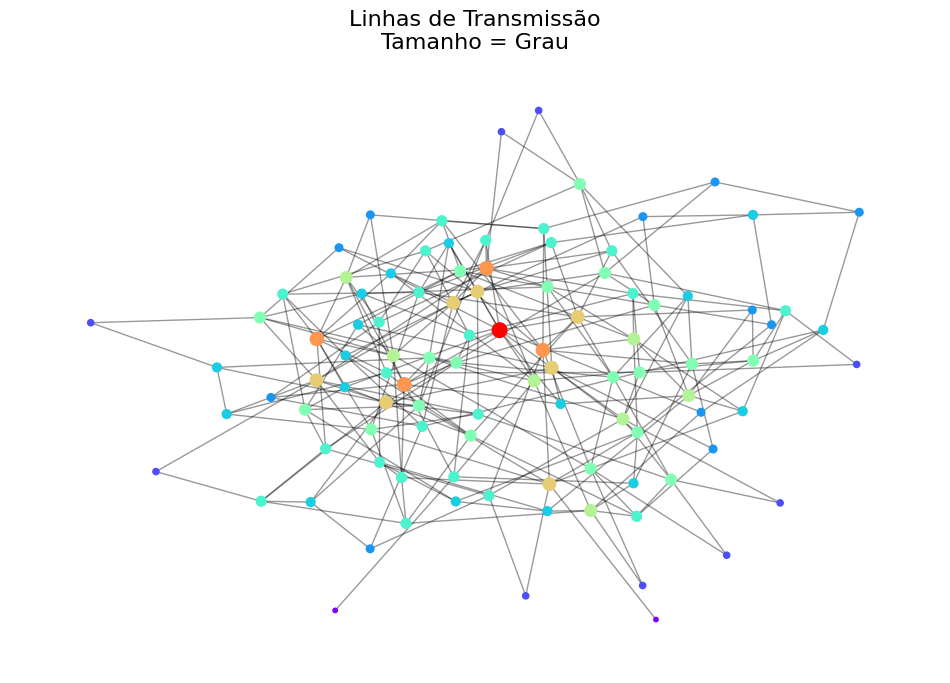

In [74]:
plt.figure(1, figsize=(12, 8))
pos=nx.fruchterman_reingold_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=degree*10, node_color=degree*10, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.title('Linhas de Transmissão\nTamanho = Grau', size=16)
plt.show()

In [75]:
# Calcula as centralidades de grau
deg_centrality = dict(nx.degree_centrality(G))
# Transforma num DataFrame (pandas)
degree_centrality = pd.DataFrame.from_dict(data=deg_centrality, orient='index')
# Apresenta apenas os valores do dicionário com as centralidades
deg_centrality.values()

dict_values([0.05050505050505051, 0.04040404040404041, 0.05050505050505051, 0.010101010101010102, 0.09090909090909091, 0.07070707070707072, 0.030303030303030304, 0.08080808080808081, 0.06060606060606061, 0.07070707070707072, 0.05050505050505051, 0.05050505050505051, 0.06060606060606061, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.030303030303030304, 0.05050505050505051, 0.08080808080808081, 0.06060606060606061, 0.04040404040404041, 0.04040404040404041, 0.05050505050505051, 0.07070707070707072, 0.08080808080808081, 0.05050505050505051, 0.05050505050505051, 0.030303030303030304, 0.030303030303030304, 0.09090909090909091, 0.08080808080808081, 0.030303030303030304, 0.08080808080808081, 0.05050505050505051, 0.06060606060606061, 0.11111111111111112, 0.04040404040404041, 0.05050505050505051, 0.04040404040404041, 0.04040404040404041, 0.09090909090909091, 0.07070707070707072, 0.020202020202020204, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.040404040404

- [degree_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#degree-centrality) - encontra o valor das centralidades de grau para cada vértice de um grafo. (Os valores são normalizados)

In [76]:
stats.describe(list(deg_centrality.values()))


DescribeResult(nobs=100, minmax=(0.010101010101010102, 0.11111111111111112), mean=0.0507070707070707, variance=0.00039571307401120695, skewness=0.31495535666992613, kurtosis=0.006351084358383385)

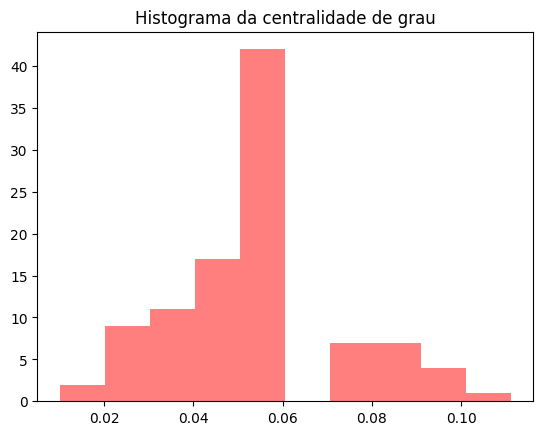

In [77]:
plt.hist(degree_centrality, color="red", alpha=.5)
plt.title('Histograma da centralidade de grau')
plt.show()

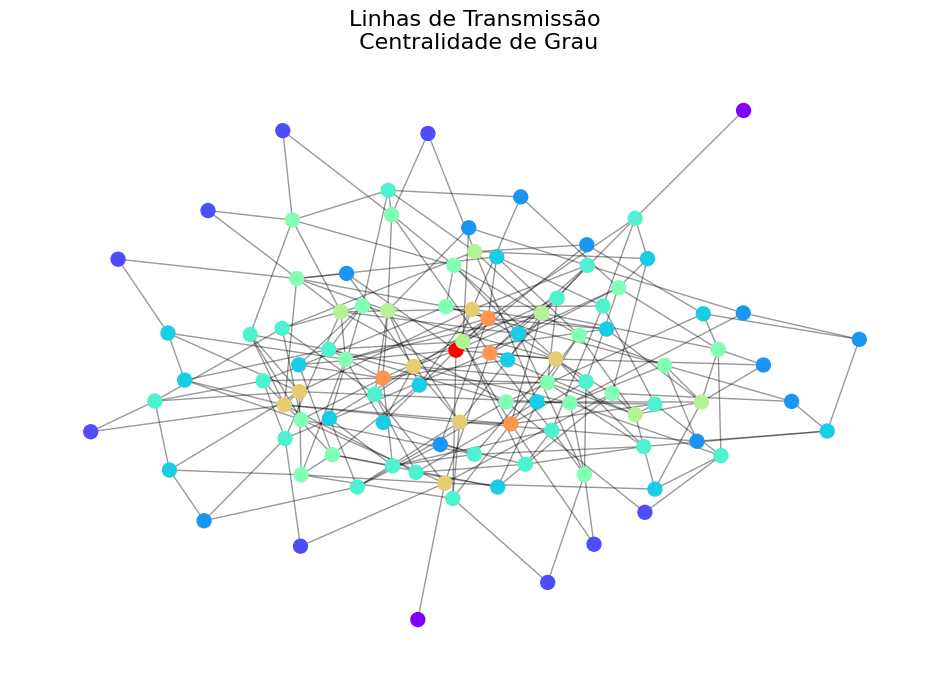

In [78]:
plt.figure(1, figsize=(12, 8))
pos=nx.fruchterman_reingold_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=100, node_color=degree_centrality*1000, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.title('Linhas de Transmissão\n Centralidade de Grau', size=16)
plt.show()

In [79]:
# Calcula as centralidades de proximidade
close_centrality = dict(nx.closeness_centrality(G))
# Transforma num DataFrame (pandas)
closeness_centrality = pd.DataFrame.from_dict(data=close_centrality, orient='index')
# Apresenta apenas os valores do dicionário com as centralidades
close_centrality.values()


dict_values([0.32459016393442625, 0.3235294117647059, 0.3289036544850498, 0.2456575682382134, 0.3852140077821012, 0.38671875, 0.31629392971246006, 0.391304347826087, 0.34375, 0.35106382978723405, 0.339041095890411, 0.3548387096774194, 0.3498233215547703, 0.32142857142857145, 0.35231316725978645, 0.34375, 0.3183279742765273, 0.32781456953642385, 0.396, 0.3535714285714286, 0.3193548387096774, 0.32038834951456313, 0.34256055363321797, 0.3707865168539326, 0.3707865168539326, 0.34615384615384615, 0.3413793103448276, 0.3183279742765273, 0.30368098159509205, 0.39919354838709675, 0.37218045112781956, 0.32459016393442625, 0.37786259541984735, 0.3498233215547703, 0.35611510791366907, 0.4008097165991903, 0.32673267326732675, 0.35231316725978645, 0.3344594594594595, 0.34615384615384615, 0.37358490566037733, 0.3639705882352941, 0.28530259365994237, 0.3333333333333333, 0.34615384615384615, 0.3680297397769517, 0.3289036544850498, 0.3413793103448276, 0.34256055363321797, 0.31528662420382164, 0.3367346

- [closeness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#closeness-centrality) - encontra o valor das centralidades de proximidade para cada vértice de um grafo. (Os valores são normalizados)

In [80]:
stats.describe(list(close_centrality.values()))


DescribeResult(nobs=100, minmax=(0.2456575682382134, 0.4008097165991903), mean=0.33633460760348144, variance=0.0009653550943185484, skewness=-0.31666123513377054, kurtosis=0.018673204585898606)

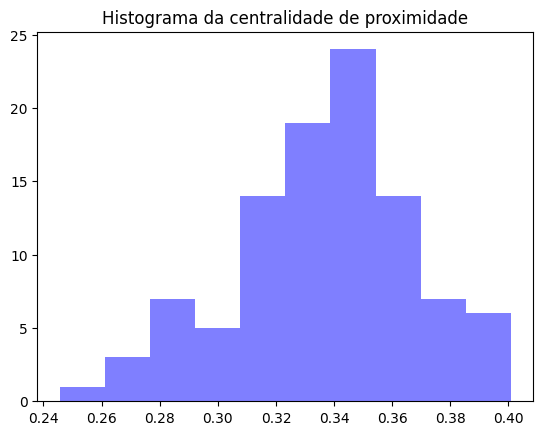

In [81]:
plt.hist(closeness_centrality, color="blue", alpha=.5)
plt.title('Histograma da centralidade de proximidade')
plt.show()

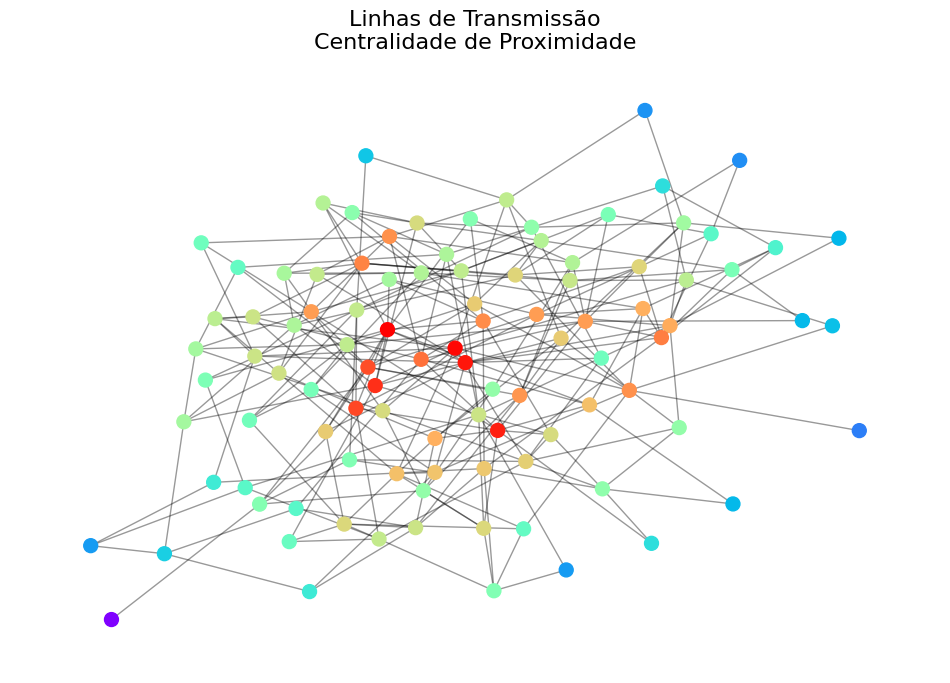

In [82]:
plt.figure(1, figsize=(12, 8))
pos=nx.fruchterman_reingold_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G,pos, node_size=100, node_color=closeness_centrality, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.title('Linhas de Transmissão\nCentralidade de Proximidade', size=16)
plt.show()

In [83]:
# Calcula as centralidades de intermediários
between_centrality = dict(nx.betweenness_centrality(G))
# Transforma num DataFrame (pandas)
betweenness_centrality = pd.DataFrame.from_dict(data=between_centrality, orient='index')
# Apresenta apenas os valores do dicionário com as centralidades
between_centrality.values()


dict_values([0.02855183651411234, 0.013506813789199476, 0.015247483669397887, 0.0, 0.05521440259359348, 0.04444141882550259, 0.003618546985893925, 0.0484814494534411, 0.023025686828480676, 0.024344825906359613, 0.018818174198508154, 0.0217898886884663, 0.02216953622812617, 0.0145595116992767, 0.025398323336158758, 0.03611838355190241, 0.0039172908220527275, 0.014563629869752319, 0.05579799681191432, 0.02314356793148309, 0.010578577152479443, 0.008070522463552401, 0.01872085325921406, 0.03666623978794301, 0.0598354621854931, 0.019242473862503686, 0.008614794232677749, 0.003423097544382421, 0.00952423341106087, 0.06888277166115574, 0.03466438525498034, 0.004535016944191141, 0.044308474178843364, 0.01514151118356437, 0.04063919546567151, 0.06861886779353762, 0.009763631601912369, 0.019244820964839104, 0.0060556450533015335, 0.008810511695301974, 0.036892273020599956, 0.04581907790782248, 0.0, 0.024183900629478856, 0.0376855647959544, 0.0309698342619645, 0.010675922487920013, 0.02373714777

- [betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) - encontra valores de centralidade de aproximação para cada vértice de um grafo. (Os valores são normalizados)

In [84]:
stats.describe(list(deg_centrality.values()))


DescribeResult(nobs=100, minmax=(0.010101010101010102, 0.11111111111111112), mean=0.0507070707070707, variance=0.00039571307401120695, skewness=0.31495535666992613, kurtosis=0.006351084358383385)

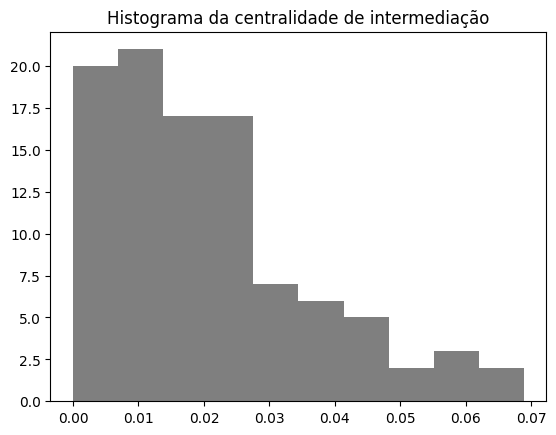

In [85]:
plt.hist(betweenness_centrality, color="black", alpha=.5)
plt.title('Histograma da centralidade de intermediação')
plt.show()

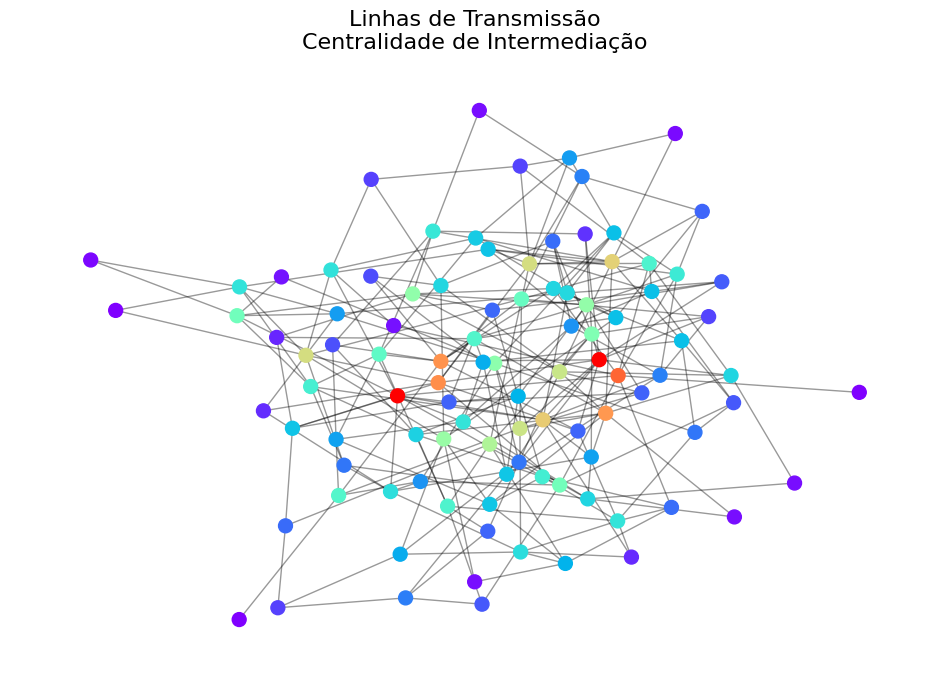

In [88]:
plt.figure(1, figsize=(12, 8))
pos=nx.fruchterman_reingold_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G,pos, node_size=100, node_color=betweenness_centrality, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.title('Linhas de Transmissão\nCentralidade de Intermediação', size=16)
plt.show()